In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


In [2]:
df = pd.read_csv('titanic_data.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.drop(columns=['PassengerId', 'Name'], inplace=True)
df.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,0,3,male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [6]:
df['Age'].fillna(df['Age'].median(), inplace=True)

In [7]:
df.drop(columns=['Cabin'], inplace=True)


In [8]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


In [9]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,female,35.0,1,0,113803,53.1000,S
4,0,3,male,35.0,0,0,373450,8.0500,S


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    object 
 7   Fare      891 non-null    float64
 8   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


<Axes: xlabel='Sex', ylabel='Count'>

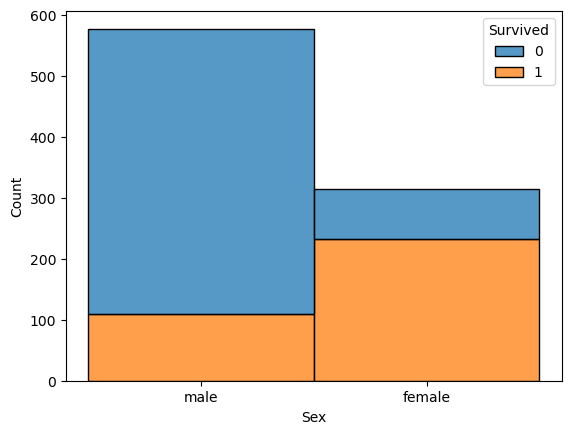

In [11]:
import seaborn as sns
sns.histplot(data=df, x='Sex', hue='Survived', multiple='stack')


**This shows that most of the males did not survived and most of the females survived**

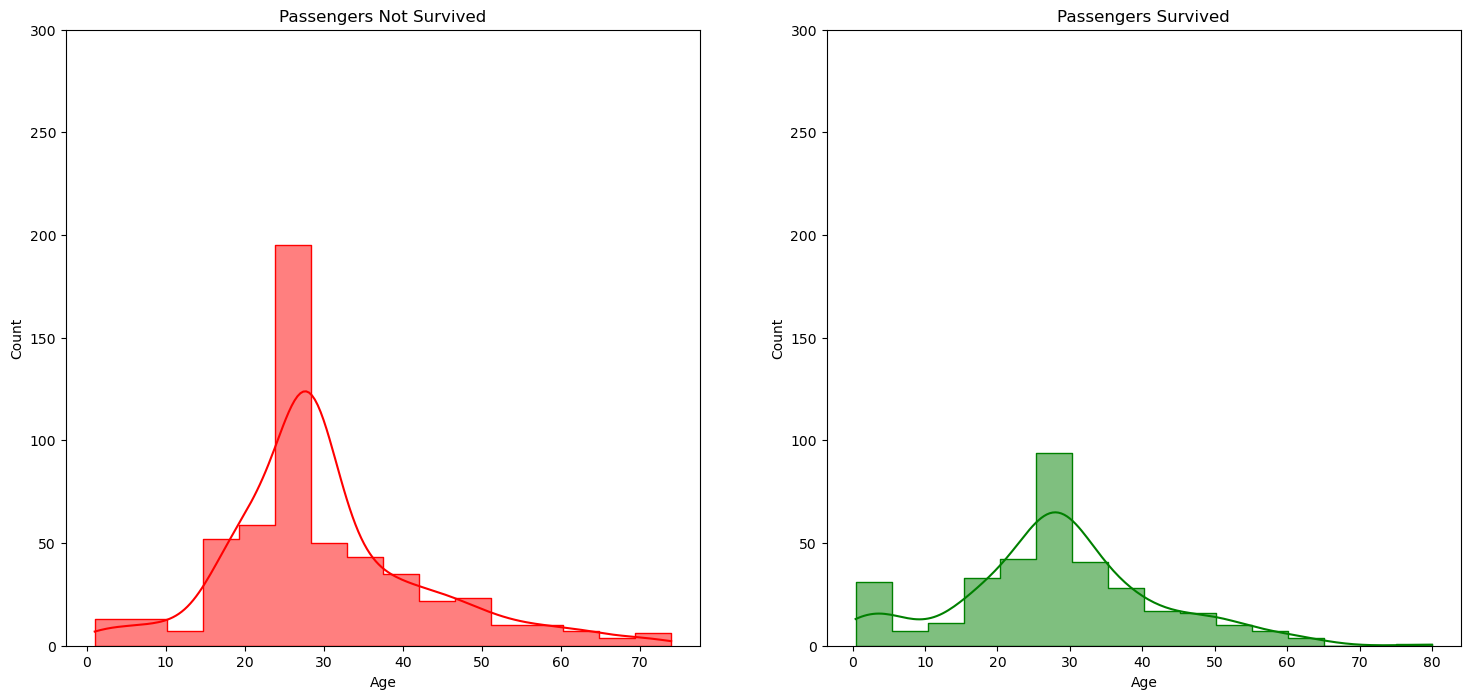

In [12]:

import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Histogram for passengers who did not survive
sns.histplot(data=df[df['Survived'] == 0], x='Age', bins=16, color='red', kde=True, element='step', ax=axes[0])
axes[0].set_ylim(0, 300)
axes[0].set_title('Passengers Not Survived')

# Histogram for passengers who survived
sns.histplot(data=df[df['Survived'] == 1], x='Age', bins=16, color='green', kde=True, element='step', ax=axes[1])
axes[1].set_ylim(0, 300)
axes[1].set_title('Passengers Survived')

plt.show()


In [13]:


from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
le = LabelEncoder()

# Encode the categorical columns
df['Sex'] = le.fit_transform(df['Sex'])
df['Ticket'] = le.fit_transform(df['Ticket'])
df['Embarked'] = le.fit_transform(df['Embarked'])

# Print the encoded DataFrame
df.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,1,22.0,1,0,523,7.2500,2
1,1,1,0,38.0,1,0,596,71.2833,0
2,1,3,0,26.0,0,0,669,7.9250,2
3,1,1,0,35.0,1,0,49,53.1000,2
4,0,3,1,35.0,0,0,472,8.0500,2


In [14]:
x = df.drop(columns=['Survived'])
y = df['Survived']

In [15]:

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(x_train, y_train)


RandomForestClassifier(max_depth=5, random_state=1)

In [17]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the model:", accuracy)


Accuracy of the model: 0.8156424581005587
